<h1>ŠKOTSKI VISKIJI ANALIZA PODATKOV</h1>

<h2> Priprava podatkov</h2>

Podatki za tabele so bili nazadnje posodobljeni 29. 12. 2020. Na to opozarjam, ker se spletna stran redno posodablja in je lahko za nekaj 10 viskijev razlike. To načeloma ne bi spremenilo veliko, edino kjer bi se lahko kaj zalomilo, je pri pridobivanju podatkov. Će bi teh 10 viskijev vplivalo na število strani, s katerih sem pobiral viskije, saj je v datoteki poberi_z_orodji.py fiksna številka za številos strani. Torej lahko bi izgubil nekaj viskijev ali pa bi se jih nekaj podvojilo (v primeru, da je fiksna številka strani večja od strani, ki obstajajo, se zadnja obstječa stran naloži še za vse strani v razliki).


Najprej bom prebral vse csv datoteke in vpelajal knjižnico pandas.

In [1]:
import pandas as pd
pd.options.display.max_rows = 10
#za risanje tudi plotly
%matplotlib inline
# naložimo razpredelnico, s katero bomo delali
import os.path
#pot_do_podatkov = os.path.join ("/Programiranje1","Analiza-podatkov-programiranje1","skotski_viskiji.csv")

skotski_viskiji = pd.read_csv('skotski_viskiji.csv')
#poddatoteke
skotski_viskiji_campbeltown = pd.read_csv('viskiji_po_regijah/skotski_viskiji_campbeltown.csv')
skotski_viskiji_highland = pd.read_csv('viskiji_po_regijah/skotski_viskiji_highland.csv')
skotski_viskiji_island = pd.read_csv('viskiji_po_regijah/skotski_viskiji_island.csv')
skotski_viskiji_islay = pd.read_csv('viskiji_po_regijah/skotski_viskiji_islay.csv')
skotski_viskiji_lowland = pd.read_csv('viskiji_po_regijah/skotski_viskiji_lowland.csv')
skotski_viskiji_speyside = pd.read_csv('viskiji_po_regijah/skotski_viskiji_speyside.csv')
skotski_viskiji_standard = pd.read_csv('viskiji_standardni_ali_stari/skotski_viskiji_standard.csv')
skotski_viskiji_old_and_rare = pd.read_csv('viskiji_standardni_ali_stari/skotski_viskiji_old_and_rare.csv')

<b>Opomba:</b> Razlog za tako število tabel je, da na spletni strani, s katere sem dobil podatke, v opisu viskija ni napisan status oziroma regija, lahko pa po tem brskaš. Najelegantnejša rešitev se mi je zdela, da sem za vsako regijo in status posebaj pridobil viskije in jih pozneje združil.

In [2]:
skotski_viskiji

,ime,cena,kolicina,procent_alkohola,cena_na_enoto
0,Bunnahabhain Stiuireadair,13.75,20.0,0.46,6.87 per 10cl
1,Glenfiddich 12 Year Old,14.95,20.0,0.40,7.47 per 10cl
2,Glenkinchie 12 Year Old,15.25,20.0,0.43,7.62 per 10cl
3,Cragganmore 12 Year Old,15.45,20.0,0.40,7.73 per 10cl
4,Talisker 10 Year Old,15.45,20.0,0.46,7.73 per 10cl
...,...,...,...,...,...
2666,Macallan 52 Year Old,75000.00,70.0,0.48,"107,142.86 per litre"
2667,Macallan 72 Year Old,85000.00,70.0,0.42,"121,428.57 per litre"
2668,Dalmore 50 Year Old,90000.00,70.0,0.52,"128,571.43 per litre"
2669,Dalmore - Candela 50 Year Old,100000.00,70.0,0.45,"142,857.14 per litre"


Vsem poddatotekam csv, ki so vsebovale le viskije ene regije bom dodal stolpec regija, s ciljem, da bom potem vse tabele sestavil skupaj in bo končna tabela vsebovala stolpec regija. Enako idejo bom uporabil tudi s statusom viskijev; imam še dve poddatoteki csv skotski_viskiji_standardn in pa skotski_viskiji_old_and_rare v obeh bom spet dodal stolpec status in jih združil v eno tabelo.

In [3]:
skotski_viskiji_campbeltown['regija'] = pd.Series(['campbeltown' for x in range(len(skotski_viskiji_campbeltown.index))])
skotski_viskiji_highland ['regija'] = pd.Series(['highland' for x in range(len(skotski_viskiji_highland.index))])
skotski_viskiji_island ['regija'] = pd.Series(['island' for x in range(len(skotski_viskiji_island.index))])
skotski_viskiji_islay ['regija'] = pd.Series(['islay' for x in range(len(skotski_viskiji_islay.index))])
skotski_viskiji_lowland ['regija'] = pd.Series(['lowland' for x in range(len(skotski_viskiji_lowland.index))])
skotski_viskiji_speyside ['regija'] = pd.Series(['speyside' for x in range(len(skotski_viskiji_speyside.index))])

skotski_viskiji_regije = skotski_viskiji_campbeltown.append(skotski_viskiji_highland.append(skotski_viskiji_island.append(skotski_viskiji_islay.append(skotski_viskiji_lowland.append(skotski_viskiji_speyside)))))

skotski_viskiji_regije

,ime,cena,kolicina,procent_alkohola,cena_na_enoto,regija
0,Glen Scotia Double Cask,34.95,70.0,0.46,49.93 per litre,campbeltown
1,Kilkerran 12 Year Old,38.95,70.0,0.46,55.64 per litre,campbeltown
2,Glen Scotia 15 Year Old,55.95,70.0,0.46,79.93 per litre,campbeltown
3,Glen Scotia 11 Year Old Sherry Double Cask Finish,55.95,70.0,0.54,79.93 per litre,campbeltown
4,Glen Scotia Victoriana,69.95,70.0,0.54,99.93 per litre,campbeltown
...,...,...,...,...,...,...
1090,Balvenie DCS Compendium Chapter 5 1962-2002,65000.00,70.0,0.51,"92,857.14 per litre",speyside
1091,Glenfarclas 1953,67000.00,150.0,0.46,"44,666.67 per litre",speyside
1092,Macallan 52 Year Old,75000.00,70.0,0.48,"107,142.86 per litre",speyside
1093,Macallan 72 Year Old,85000.00,70.0,0.42,"121,428.57 per litre",speyside


<em>Opomba:</em> Ta tabela ima en viskij manj kot tabela vseh viskijev, to ni moja napak ampak na spletni strani manjkajo podatki o regiji za en viskji

In [4]:
skotski_viskiji_standard['status'] = pd.Series(['standardni' for x in range(len(skotski_viskiji_standard.index))])
skotski_viskiji_old_and_rare['status'] = pd.Series(['stari_in_posebni' for x in range(len(skotski_viskiji_standard.index))])

skotski_viskiji_status = skotski_viskiji_old_and_rare.append(skotski_viskiji_standard)

skotski_viskiji_status

,ime,cena,kolicina,procent_alkohola,cena_na_enoto,status
0,Glen Moray 8 Year Old,69.95,75.0,0.43,93.27 per litre,stari_in_posebni
1,Macallan 12 Year Old Double Cask,69.95,70.0,0.40,99.93 per litre,stari_in_posebni
2,Bn3 – Elements of Islay,74.95,50.0,0.56,149.90 per litre,stari_in_posebni
3,The Speyside 8 Year Old,79.95,75.0,0.43,106.60 per litre,stari_in_posebni
4,Br5 - Elements of Islay,79.95,50.0,0.54,159.90 per litre,stari_in_posebni
...,...,...,...,...,...,...
1080,Macallan 1950,60000.00,70.0,0.53,"85,714.29 per litre",standardni
1081,Glenfarclas 1953,61000.00,150.0,0.46,"40,666.67 per litre",standardni
1082,Balvenie DCS Compendium Chapter 5 1962-2002,65000.00,70.0,0.51,"92,857.14 per litre",standardni
1083,Glenfarclas 1953,67000.00,150.0,0.46,"44,666.67 per litre",standardni


Vse potrebne tabele so pripravljene.

<h2>Odgovori na hipoteze </h2>

<em>Hipoteza 1:</em> Katera regija ima v povprečju najdražje in katera najcenejše viskije?

In [5]:
#za občutek, kje se številke gibljejo
skotski_viskiji_regije.mean()


cena                2071.486311
kolicina              71.868015
procent_alkohola       0.474989
dtype: float64

In [6]:
povprecne_cene= {'regija':['campeltown','highland','island','islay','lowland','speyside'], 'povprecna_cena':[round(skotski_viskiji_campbeltown.mean()[0],2), round(skotski_viskiji_highland.mean()[0],2), round(skotski_viskiji_island.mean()[0],2), round(skotski_viskiji_islay.mean()[0],2), round(skotski_viskiji_lowland.mean()[0],2), round(skotski_viskiji_speyside.mean()[0],2)]}

povprecne_cene_po_regijah = pd.DataFrame(povprecne_cene, columns=['regija','povprecna_cena'])

povprecne_cene_po_regijah.sort_values('povprecna_cena')

,regija,povprecna_cena
4,lowland,1058.40
2,island,1221.68
1,highland,1529.40
3,islay,2271.49
5,speyside,2512.34
0,campeltown,3144.74


<em>Odgovor 1:</em> Kot preberemo iz tabele so daleč najdražji viskiji iz Campeltowna in najcenejši viskiji iz Lowlanda. Treba je omeniti tudi, da je sicer najmanj viskijev iz Campeltowna, vendar jih pa ni največ iz Lowlanda. Največ viskijev prihaja iz regije Speyside, ki pa ima druga najvišjo povprečno ceno. Zaključujem, da število viskijev iz regije ni povezano s poprečno ceno glede na regijo. Vidimo, da v Campeltownu pridelujejo najmanj, vendar najbolj kakovostne (najdražje) viskije.

<em>Hipoteza 2:</em> Ali procent alkohola vpliva na ceno viskija oziroma ali velja večji procent alkohola, tem dražji bo viski?

In [7]:
skotski_viskiji

,ime,cena,kolicina,procent_alkohola,cena_na_enoto
0,Bunnahabhain Stiuireadair,13.75,20.0,0.46,6.87 per 10cl
1,Glenfiddich 12 Year Old,14.95,20.0,0.40,7.47 per 10cl
2,Glenkinchie 12 Year Old,15.25,20.0,0.43,7.62 per 10cl
3,Cragganmore 12 Year Old,15.45,20.0,0.40,7.73 per 10cl
4,Talisker 10 Year Old,15.45,20.0,0.46,7.73 per 10cl
...,...,...,...,...,...
2666,Macallan 52 Year Old,75000.00,70.0,0.48,"107,142.86 per litre"
2667,Macallan 72 Year Old,85000.00,70.0,0.42,"121,428.57 per litre"
2668,Dalmore 50 Year Old,90000.00,70.0,0.52,"128,571.43 per litre"
2669,Dalmore - Candela 50 Year Old,100000.00,70.0,0.45,"142,857.14 per litre"


<AxesSubplot:title={'center':'Cena viskija v odvisnosti od procenta alkohola'}, xlabel='procent_alkohola', ylabel='cena'>

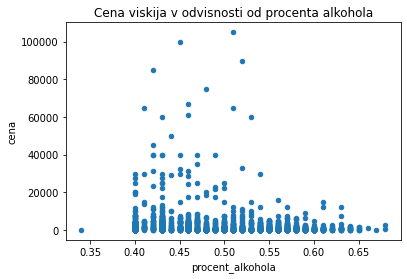

In [8]:
skotski_viskiji.plot.scatter('procent_alkohola','cena', title='Cena viskija v odvisnosti od procenta alkohola')

<em>Odgovor 2:</em> Iz grafa razberemo, da ni vidne povezave med procentom alkohola in ceno viskija. Vidimo celo, da so viskiji z večjimi procenti alkohola cenejsi kot nekateri z manjšim procentom alkohola. 

<em>Hipoteza 3:</em> Ali je večji procent alkohola v posebnih in starih viskijih kot v standardnih vskijih in ali so posebni in stari res dražji od standardnih?

In [9]:
skotski_viskiji_old_and_rare.mean()[2]- skotski_viskiji_standard.mean()[2]

-0.004261464077963295

<em>Odgovor 3:</em> Na vprašanje o vsebovanosti alkohola je odgovor torej ne. Vidimo celo, da standardni vsebujejo slabe pol procenta več alkohola kot stari in posebni.

In [10]:
skotski_viskiji_old_and_rare.mean()[0] - skotski_viskiji_standard.mean()[0]

1427.6917159361

<em>Odgovor 3.1:</em> Povsem pričakovano so stari in posebni viskiji v povprečju precej dražji in sicer za kar 1427 funta.

<em>Hipoteza 4:</em> 70% vseh viskijev je cenejših od 200 funtov.

In [11]:
round(skotski_viskiji[skotski_viskiji.cena<200].ime.count() / skotski_viskiji.ime.count() * 100, 2)

31.37

<em>Odgovor 4:</em> Polpoln polom. :( Moja hipoteza povsem napačna, le dobrih 30% viskijev je cenejših od 200 funtov.

<em>Hipoteza 5:</em> Kolikšen je povprečni odstotek alkohola v viskijih za vsako regijo?

In [12]:
odstotek_alk_regije = {'regija':['campeltown','highland','island','islay','lowland','speyside'],'povprecni_proc_alk_regije': [skotski_viskiji_campbeltown.procent_alkohola.mean(),skotski_viskiji_highland.procent_alkohola.mean(),skotski_viskiji_island.procent_alkohola.mean(), skotski_viskiji_islay.procent_alkohola.mean(), skotski_viskiji_lowland.procent_alkohola.mean(), skotski_viskiji_speyside.procent_alkohola.mean()]}

povprecn_odstotek_alk_po_regijah = pd.DataFrame(odstotek_alk_regije, columns=['regija','povprecni_proc_alk_regije'])
povprecn_odstotek_alk_po_regijah.sort_values('povprecni_proc_alk_regije',ascending=False)


,regija,povprecni_proc_alk_regije
3,islay,0.490482
4,lowland,0.487113
1,highland,0.476997
2,island,0.474196
0,campeltown,0.472118
5,speyside,0.465607


<em>Odgovor 5:</em> Podatki nekako potrdijo kar je tudi splošno znano: viskiji iz regije Islay slovijo kot najmočnejši, kar ta tabela potrdi. Vidimo pa tudi, da odmik pri procentu vsebovanosti alkohola ni tako majhen; razlika med povprečnim procentom alkohola iz regij Islay in Speyeside je skoraj 2.5%.

<h2>Porazdelitve</h2>
 

CILJ 1: Poiskati porazdelitev viskijev glede na procent alkohola.

In [13]:
sez = []
sez1=[]
for element in skotski_viskiji.procent_alkohola.sort_values():
    if element not in sez:
        sez.append(element)
for procent in sez:
    vsota = 0
    for procent1 in skotski_viskiji.procent_alkohola.sort_values():
        if procent == procent1:
            vsota +=1
    sez1.append(vsota)

slovar = {'procent_alkohola': sez,'stevilo_viskijev': sez1}
procent_alkohola_analiza = pd.DataFrame(slovar)
procent_alkohola_analiza
    

,procent_alkohola,stevilo_viskijev
0,0.34,1
1,0.40,462
2,0.41,26
3,0.42,43
4,0.43,512
...,...,...
25,0.64,13
26,0.65,7
27,0.66,1
28,0.67,1


<AxesSubplot:title={'center':'Porazdelitev viskijev glede na vsebovanost alkohola'}, xlabel='procent_alkohola'>

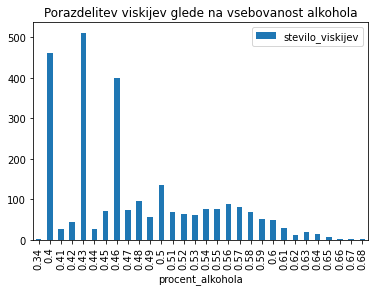

In [14]:
procent_alkohola_analiza.plot.bar(x='procent_alkohola',y='stevilo_viskijev',title='Porazdelitev viskijev glede na vsebovanost alkohola')

Ta graf je nakoliko presenetljiv, saj smo pričakovali bolj "gladko" porazdelitev, so pa očitno trije maksimumi dokaj izolirani. Osamitve so pri 40%, 43% in pri 46%. Moje predvidevanje je, da so to standardne/tradiconalne količine alkohola v škotskih viskijih.

CILJ 2: Porazdelitev cen med viskiji.

In [15]:
sez = []
sez1=[]
for element in skotski_viskiji.cena:
    if element not in sez:
        sez.append(element)
for cena in sez:
    vsota = 0
    for cena1 in skotski_viskiji.cena:
        if cena == cena1:
            vsota +=1
    sez1.append(vsota)

slovar = {'cena': sez,'stevilo_viskijev': sez1}
porazdelitev_cene = pd.DataFrame(slovar)

In [16]:
porazdelitev_cene

,cena,stevilo_viskijev
0,13.75,1
1,14.95,3
2,15.25,1
3,15.45,2
4,15.95,2
...,...,...
389,75000.00,1
390,85000.00,1
391,90000.00,1
392,100000.00,1


<AxesSubplot:title={'center':'Porazdelitev viskijov glede ceno'}, xlabel='cena'>

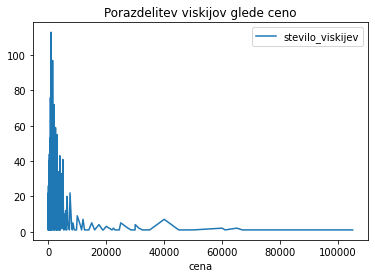

In [17]:
porazdelitev_cene.plot(x='cena',y='stevilo_viskijev',title='Porazdelitev viskijov glede ceno')

Graf bom narisal še enkrat, saj vidimo, da doseže maksimum nekje blizu 500 funtov, ampak težko rečemo natančno kje. Iz grafa se pa tudi razbere da je dosežen še en maksimum pri 40 000 funtov. To mi je nekoliko presenetljivo, saj bi predvideval, da bo število viskijev padalo s povečanjem cene.

In [18]:
porazdelitev_cene_manjse_od_2000 = porazdelitev_cene[porazdelitev_cene.cena < 2000]
porazdelitev_cene_manjse_od_2000

,cena,stevilo_viskijev
0,13.75,1
1,14.95,3
2,15.25,1
3,15.45,2
4,15.95,2
...,...,...
298,1825.00,1
299,1850.00,6
300,1900.00,3
301,1950.00,2


<AxesSubplot:title={'center':'Porazdelitev viskijev glede na ceno (cena<2000 funtov)'}, xlabel='cena'>

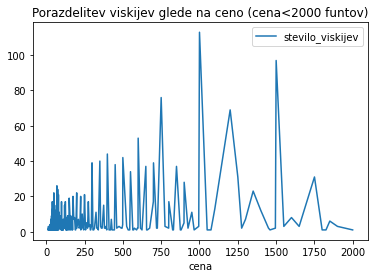

In [19]:
porazdelitev_cene_manjse_od_2000.plot(x='cena',y='stevilo_viskijev',title='Porazdelitev viskijev glede na ceno (cena<2000 funtov)')

Iz tega grafa so stvari nekoliko bolj razvidne. Cene so najbolj zgoščene od 0 do 250 funtov (to pomeni, da je tam največ različnih cen viskijev). Cene so nato manj goste, vendar dosegajo večje maksimume, se pravi več viskijev ima natanko eno ceno. Iz grafa vidimo, da ima največ viskijev ceno 1000 in 1500 funtov.